In [133]:
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
from mpl_toolkits import mplot3d
from math import *
import sympy as sp
sp.init_printing(use_unicode=True)

# Question 1

# (a)

In [134]:
#uij = mean of i-th class and j-th dimension
u11 = 0.5
u12 = 0.8
u21 = 0.9
u22 = 0.2

In [135]:
rv11 = bernoulli.rvs(u11,size = 100)
rv12 = bernoulli.rvs(u12,size = 100)
rv21 = bernoulli.rvs(u21,size = 100)
rv22 = bernoulli.rvs(u22,size = 100)

In [136]:
data1 = {}
data2 = {}

c1 = [1]*100
c2 = [2]*100

data1['f1'] = list(rv11)
data1['f2'] = list(rv12)
data1['class'] = c1
data2['f1'] = list(rv21)
data2['f2'] = list(rv22)
data2['class']= c2

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

In [137]:
print('Data generation')
print(df1)
print(df2)

Data generation
    f1  f2  class
0    1   0      1
1    1   1      1
2    0   1      1
3    1   0      1
4    0   1      1
..  ..  ..    ...
95   0   1      1
96   0   1      1
97   0   1      1
98   1   1      1
99   0   1      1

[100 rows x 3 columns]
    f1  f2  class
0    1   0      2
1    1   0      2
2    1   0      2
3    1   0      2
4    1   0      2
..  ..  ..    ...
95   1   0      2
96   1   0      2
97   1   0      2
98   1   0      2
99   1   1      2

[100 rows x 3 columns]


In [138]:
def computeMLE(xi, n):
  return sum(xi[:n])/n

In [139]:
def plotN_MLE(l,s):

  x = []
  y = []

  for i in range(1,51):
    x.append(i)
    y.append(computeMLE(l,i))

  plt.plot(x, y)
  plt.xlabel("n")  
  plt.ylabel("MLE")  
  plt.title(s)  
  plt.show()

# (b)

In [140]:
# split a dataset into train and test sets
features1 = df1.loc[ : , df1.columns != 'class']
labels1 = pd.DataFrame(df1['class'])

# split into train test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(features1, labels1, test_size=0.50, random_state = 0)

In [141]:
u11_mle = computeMLE(X_train1['f1'].tolist(),50)
u12_mle = computeMLE(X_train1['f2'].tolist(),50)
u1_mle = np.array([u11_mle,u12_mle])
print('The MLE for class 1 is')
print(u1_mle)

The MLE for class 1 is
[0.54 0.72]


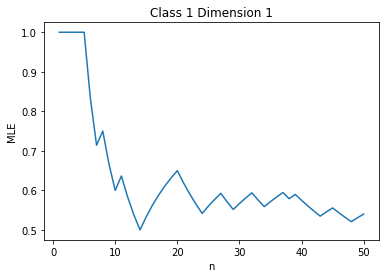

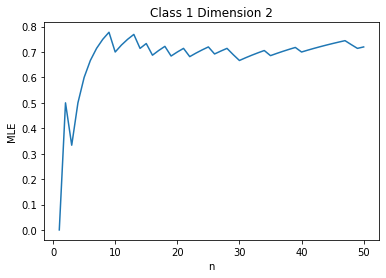

In [142]:
plotN_MLE(X_train1['f1'].tolist(),'Class 1 Dimension 1')
plotN_MLE(X_train1['f2'].tolist(),'Class 1 Dimension 2')

# (c)

In [143]:
# split a dataset into train and test sets
features2 = df2.loc[ : , df2.columns != 'class']
labels2 = pd.DataFrame(df2['class'])

# split into train test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, labels2, test_size=0.50, random_state = 0)

In [144]:
u21_mle = computeMLE(X_train2['f1'].tolist(),50)
u22_mle = computeMLE(X_train2['f2'].tolist(),50)
u2_mle = np.array([u21_mle,u22_mle])
print('The MLE for class 2 is')
print(u2_mle)

The MLE for class 2 is
[0.82 0.2 ]


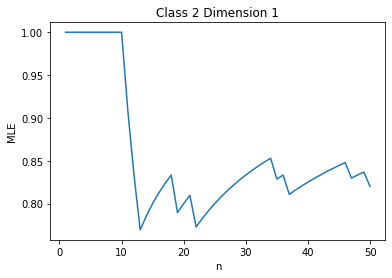

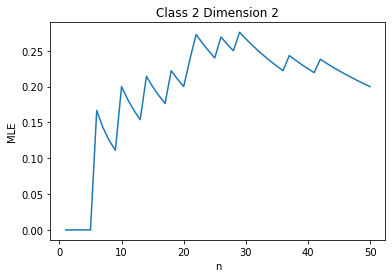

In [145]:
plotN_MLE(X_train2['f1'].tolist(),'Class 2 Dimension 1')
plotN_MLE(X_train2['f2'].tolist(),'Class 2 Dimension 2')

# (d)

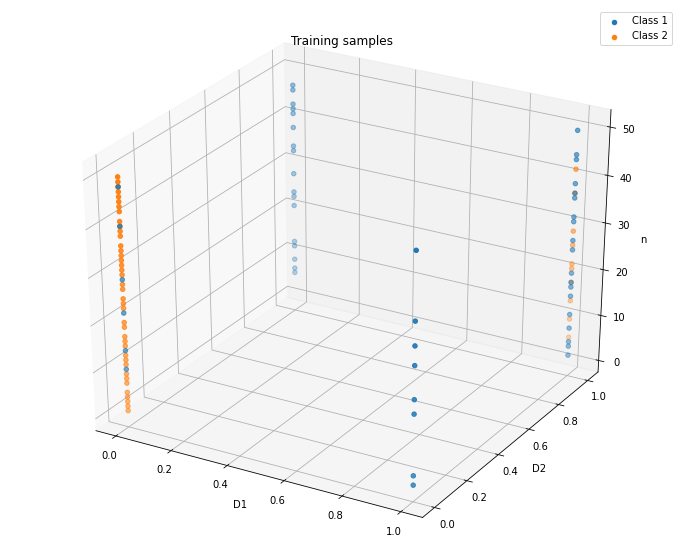

In [146]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection ='3d')

z = []
for i in range(0,50):
  z.append(i+1)

x = X_train1['f1'].tolist()
y = X_train1['f2'].tolist()

# plotting
ax.scatter3D(x, y, z, label='Class 1')

x = X_train2['f2'].tolist()
y = X_train2['f2'].tolist()

ax.scatter3D(x, y, z, label='Class 2')

ax.set_xlabel('D1')
ax.set_ylabel('D2')
ax.set_zlabel('n')
ax.set_title('Training samples')
plt.legend()
plt.show()


# (e)

In [147]:
def discriminant(mu11, mu12, mu21, mu22, x1, x2):
  d1 = pow(mu11, x1)*pow(1-mu11, 1-x1)*pow(mu12, x2)*pow(1-mu12, 1-x2)
  d2 = pow(mu21, x1)*pow(1-mu21, 1-x1)*pow(mu22, x2)*pow(1-mu22, 1-x2)
  if d1>=d2:
    return 1
  else:
    return 2

In [148]:
X_test1_f1 = X_test1['f1'].tolist()
X_test1_f2 = X_test1['f2'].tolist()
pred1 = []
for i in range(50):
  d = discriminant(u11, u12, u21, u22, X_test1_f1[i], X_test1_f2[i])
  pred1.append(d)

In [149]:
X_test2_f1 = X_test2['f1'].tolist()
X_test2_f2 = X_test2['f2'].tolist()
pred2 = []
for i in range(50):
  d = discriminant(u11, u12, u21, u22, X_test2_f1[i], X_test2_f2[i])
  pred2.append(d)

In [150]:
num1 = 0
num2 = 0

for i in range(50):
  if pred1[i]==1:
    num1 += 1
  if pred2[i]==2:
    num2 += 1

print('Accuracy for class 1')
print(num1/50)
print('Accuracy for class 2')
print(num2/50)

Accuracy for class 1
0.9
Accuracy for class 2
0.72


# Question 2

# (c)

In [151]:
X = np.array([[2,4],[6,8]])
mu = np.array([[3],[7]])

print('X')
print(X)

print()

print('Mean')
print(mu)

X
[[2 4]
 [6 8]]

Mean
[[3]
 [7]]


In [152]:
Xc = np.array([[-1,1],[-1,1]])
print('Centralised X')
print(Xc)

Centralised X
[[-1  1]
 [-1  1]]


In [153]:
S = 0.5*(np.dot(Xc,np.transpose(Xc)))
print('The covariance')
print(S)

The covariance
[[1. 1.]
 [1. 1.]]


In [154]:
e1, e2 = np.linalg.eig(S)

print('Eigenvalue 1')
print(e1[0])
print('Eigenvalue 2')
print(e1[1])

print()
print('The eigenvectors are')

print('       1           2')
print(e2)

Eigenvalue 1
2.0
Eigenvalue 2
0.0

The eigenvectors are
       1           2
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


The eigenvalues from the code is same as those computed from theory. But the eigenvectors are not same. This happens because the numpy and scipy libraries normalise the eigenvectors. However, sympy library solves this problem. As coded below, the eigenvectors now match.

In [155]:
S_ = sp.Matrix([[1, 1], [1, 1]])
E = S_.eigenvects()
print('Eigenvector 1')
print(E[1][2][0])
print()
print('Eigenvector 2')
print(E[0][2][0])

Eigenvector 1
Matrix([[1], [1]])

Eigenvector 2
Matrix([[-1], [1]])


In [156]:
U = np.array([[int(E[1][2][0][0]),int(E[0][2][0][0])],[int(E[1][2][0][1]),int(E[0][2][0][1])]])

In [157]:
print('U')
print(U)

U
[[ 1 -1]
 [ 1  1]]


In [158]:
Y = np.dot(np.transpose(U),Xc)
print('Y')
print(Y)

Y
[[-2  2]
 [ 0  0]]


In [159]:
X_ = np.dot(U,Y)
print(X_)
print()

X_[0][0] += 3
X_[0][1] += 3
X_[1][0] += 7
X_[1][1] += 7

print('After adding mean')
print(X_)

[[-2  2]
 [-2  2]]

After adding mean
[[1 5]
 [5 9]]


In [160]:
mse = 0
for i in range(2):
  for j in range(2):
    mse += pow(X_[i][j]-X[i][j],2)
mse /= 4
print('MSE = ',mse)

MSE =  1.0


# (d)

In [194]:
d = 10
N = 100
mu = np.array([0]*d)
sigma = np.array([0.1]*d)
X = np.empty((d,N))
for i in range(d):
  xi = np.random.normal(mu[i], sigma[i], N)
  X[i] = xi

In [195]:
print('X = ',X)

X =  [[-5.01975050e-02 -1.99170934e-01 -2.77915397e-02 -7.55927814e-02
  -7.41516670e-02  2.07375774e-02 -1.42659545e-01  1.70061899e-01
  -1.61616431e-01 -7.34334828e-02  8.90503823e-02  1.07623896e-02
   8.52217513e-02 -1.40993130e-01  4.07077940e-02 -1.39209011e-02
   2.42670920e-01 -8.36254934e-02 -3.61724096e-02  6.05718163e-02
  -2.60083545e-02 -2.73155695e-03  1.39864895e-01 -6.35054535e-02
   1.55155331e-02  8.41795214e-02  1.29535072e-03 -6.85973376e-02
   8.88607685e-02  1.14979736e-01  3.57869823e-02  4.02102176e-02
   1.22555224e-01 -3.68109623e-02  9.85429107e-02 -7.41909394e-03
   5.28650570e-02 -1.09805206e-02  9.59638887e-02 -1.62235006e-01
   3.15853499e-02  5.40538497e-02  1.42632603e-01 -2.49217514e-02
   8.88462702e-02 -1.19782507e-01  1.85059703e-01  4.06621722e-02
  -3.52655079e-02  6.11406729e-02  1.89256792e-02 -2.93858191e-01
  -4.83817892e-02 -6.84023645e-02 -1.36760752e-01 -5.82020099e-02
  -2.15022125e-01  2.13520803e-02 -9.28200460e-02 -8.62172777e-02
  -7.

# (e)

In [196]:
Xc = np.empty((d,N))
for i in range(d):
  for j in range(N):
    Xc[i][j] = X[i][j]-mu[i]

print('Xc = ', Xc)

S = (np.dot(Xc,np.transpose(Xc)))/N

eigenValues, eigenVectors = np.linalg.eig(S)

idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]

print(eigenValues)
print('U = ', eigenVectors)

Xc =  [[-5.01975050e-02 -1.99170934e-01 -2.77915397e-02 -7.55927814e-02
  -7.41516670e-02  2.07375774e-02 -1.42659545e-01  1.70061899e-01
  -1.61616431e-01 -7.34334828e-02  8.90503823e-02  1.07623896e-02
   8.52217513e-02 -1.40993130e-01  4.07077940e-02 -1.39209011e-02
   2.42670920e-01 -8.36254934e-02 -3.61724096e-02  6.05718163e-02
  -2.60083545e-02 -2.73155695e-03  1.39864895e-01 -6.35054535e-02
   1.55155331e-02  8.41795214e-02  1.29535072e-03 -6.85973376e-02
   8.88607685e-02  1.14979736e-01  3.57869823e-02  4.02102176e-02
   1.22555224e-01 -3.68109623e-02  9.85429107e-02 -7.41909394e-03
   5.28650570e-02 -1.09805206e-02  9.59638887e-02 -1.62235006e-01
   3.15853499e-02  5.40538497e-02  1.42632603e-01 -2.49217514e-02
   8.88462702e-02 -1.19782507e-01  1.85059703e-01  4.06621722e-02
  -3.52655079e-02  6.11406729e-02  1.89256792e-02 -2.93858191e-01
  -4.83817892e-02 -6.84023645e-02 -1.36760752e-01 -5.82020099e-02
  -2.15022125e-01  2.13520803e-02 -9.28200460e-02 -8.62172777e-02
  -7

# (f)

In [197]:
def computeMSE(X1, X2, ro, col):
  mse = 0
  for i in range(ro):
    for j in range(col):
      mse += pow(X1[i][j]-X2[i][j],2)
  mse = mse/(d*N)
  return mse

In [198]:
def computeY(U,xc,p):
  U = U[:,:p]
  # print('UUUU = ', U)
  Y = np.dot(np.transpose(U),xc)
  return Y

In [199]:
def computeFinalX(u,y,mean,p,d,N):
  u = u[:,:p]
  x = np.dot(u,y)
  for i in range(d):
    for j in range(N):
      x[i][j] += mean[i]
  return x

In [200]:
Y = computeY(eigenVectors,Xc,d)
X_ = computeFinalX(eigenVectors,Y,mu,d,d,N)
mse = computeMSE(X_,X,d,N)
print(mse)

5.887455264518698e-32


# (g)

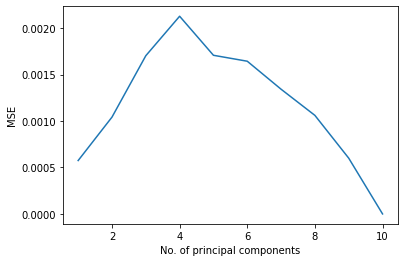

In [202]:
x_axis = []
y_axis = []

for i in range(d):
  x_axis.append(i+1)
  Y = computeY(eigenVectors,Xc,i+1)
  X_ = computeFinalX(eigenVectors,Y,mu,i+1,d,N)
  mse = computeMSE(X_,X,i+1,N)
  y_axis.append(mse)

plt.plot(x_axis, y_axis)
plt.xlabel('No. of principal components')
plt.ylabel('MSE')
plt.show()